<a href="https://colab.research.google.com/github/Arjun-08/STATISTICS-UNIT.04/blob/main/Unit_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNIT-04:
CATEGORICAL DATA ANALYSIS AND GOODNESS OF FIT TESTS

---



**IMPORT FUNCTIONS**

In [ ]:
import numpy as np
import pandas as pd
import math as m
import statistics as s
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Arjun-08/FOOTBALL_DATASET/main/statistics%20case%20study%20dataset%20-%20football.csv', encoding="utf-8")
df


,player_id,player,nationality,squad,birth_year,value,height,position,foot,league,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,58,Allan,br BRA,Napoli,1991,33000000,175,midfield - Central Midfield,right,Serie A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,858,Gabi,es ESP,AtlÃ©tico Madrid,1983,3000000,181,midfield - Defensive Midfield,right,La Liga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,870,KÃ©vin Gameiro,fr FRA,AtlÃ©tico Madrid,1987,20000000,172,attack - Centre-Forward,right,La Liga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1568,IÃ±igo MartÃ­nez,es ESP,Athletic Club,1991,32000000,182,Defender - Centre-Back,left,La Liga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,988,Antoine Griezmann,fr FRA,AtlÃ©tico Madrid,1991,100000000,176,attack - Second Striker,left,La Liga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,999,Ramiro Guerra,uy URU,Villarreal,1997,30000,183,midfield - Central Midfield,right,La Liga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,837,Ben Foster,eng ENG,West Brom,1983,3000000,193,Goalkeeper,left,Premier League,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,916,Kieran Gibbs,eng ENG,West Brom,1989,8000000,180,Defender - Left-Back,left,Premier League,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,177,Florent Balmont,fr FRA,Dijon,1980,25000,168,midfield - Central Midfield,right,Ligue 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


GOODNESS OF FIT

A Football analyst wished to see whether the football players have any preference of scoring a goal among four different positions in 2018. A sample of 50 players provided these data. Is there enough evidence to reject the claim that there is no preference in scoring the goal? Let α=0.05.

H0: there is no preference in scoring the goal(claim)

H1: there is preference in scoring the goal

The observed values are [19, 24, 25, 0]
The expected values are [17, 17, 17, 17]
The test value is 23.88235294117647
Reject Null Hypothesis 
NOT A GOOD FIT


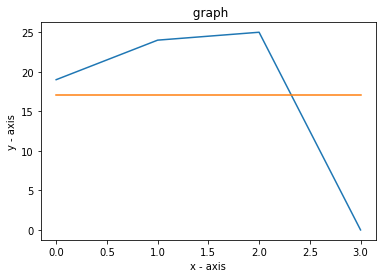

In [ ]:

sample = df.sample(50)        #drawn 50 random sample from the dataframe

# attack_second
attack_second = sample.copy()[sample["position"]=="attack - Second Striker"]
attack_second_goals = attack_second["goals_2018"].values      #gives array of all goals in 2018
attack_second_goals = np.sum(attack_second_goals)             #addition of elements of an array
attack_second_goals                                           #results in total number of goals scored in 2018 from that position

#midfield_centre
midfield_center = sample.copy()[sample["position"]=="midfield - Central Midfield"]
midfield_center_goals = midfield_center["goals_2018"].values
midfield_center_goals = np.sum(midfield_center_goals)
midfield_center_goals

# attack_centre
attack_centre = sample.copy()[sample["position"]=="attack - Centre-Forward"]
attack_centre_goals = attack_centre["goals_2018"].values 
attack_centre_goals = np.sum(attack_centre_goals)
attack_centre_goals

# #midfield_attack
midfield_attack = sample.copy()[sample["position"]=="midfield - Attacking Midfield"]
midfield_attack_goals = midfield_attack["goals_2018"].values 
midfield_attack_goals = np.sum(midfield_attack_goals)
midfield_attack_goals

observed_vals = [attack_second_goals, midfield_center_goals, attack_centre_goals, midfield_attack_goals]

print("The observed values are", observed_vals)
goal_sum = sum(observed_vals)
expected_for_each = goal_sum//4

observed_values = observed_vals
expected_values = [expected_for_each]*len(observed_vals)
print("The expected values are",expected_values)

n = len(observed_values)
dof = n-1             #3 
chi_square = 0
tab_val = 7.815       #alpha= 0.05


for i in range(0,n):
    chi_square += (observed_values[i]-expected_values[i])**2/expected_values[i]

print("The test value is", chi_square)

if(tab_val < chi_square):
    print("Reject Null Hypothesis \nNOT A GOOD FIT")
else:
    print("Accept Null Hypothesis \n GOOD FIT")

# plotting the points 
plt.plot(observed_values)
plt.plot(expected_values)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title(' graph')
  
# function to show the plot
plt.show()

**TEST FOR INDEPENDENCE**

The football analyst wishes to see if the goal scoring in 2 year obtained information is independent of their position . A survey of 50  players  yielded this information. At α= 0.05, test the claim that the the goal scoring in 2 year obtained information is independent of their position.

H0: the goal scoring in 2 year obtained information is independent of their position.(claim)

H1: the goal scoring in 2 year obtained information is dependent of their position.

In [ ]:
sample = df.sample(50)                                      #drawn 50 random sample from the dataframe

#midfield_centre
midfield_center = sample.copy()[sample["position"]=="midfield - Central Midfield"]
midfield_center_goals = midfield_center["goals_2018"].values            #gives array of all goals in 2018
midfield_center_goals = np.sum(midfield_center_goals)                   #addition of elements of an array
midfield_center_goals                                                   #results in total number of goals scored in 2018 from that position

# attack_centre
attack_centre = sample.copy()[sample["position"]=="attack - Centre-Forward"]
attack_centre_goals = attack_centre["goals_2018"].values
attack_centre_goals = np.sum(attack_centre_goals)
attack_centre_goals

# #midfield_attack
midfield_attack = sample.copy()[sample["position"]=="midfield - Attacking Midfield"]
midfield_attack_goals = midfield_attack["goals_2018"].values
midfield_attack_goals = np.sum(midfield_attack_goals)
midfield_attack_goals


observed_vals_2018 = [ midfield_center_goals, attack_centre_goals, midfield_attack_goals]
print("observed values in 2018- ",observed_vals_2018)

# #midfield_centre
midfield_center = sample.copy()[sample["position"]=="midfield - Central Midfield"]
midfield_center_goals = midfield_center["goals_2019"].values
midfield_center_goals = np.sum(midfield_center_goals)
midfield_center_goals

# attack_centre
attack_centre = sample.copy()[sample["position"]=="attack - Centre-Forward"]
attack_centre_goals = attack_centre["goals_2019"].values
attack_centre_goals = np.sum(attack_centre_goals)
attack_centre_goals

# #midfield_attack
midfield_attack = sample.copy()[sample["position"]=="midfield - Attacking Midfield"]
midfield_attack_goals = midfield_attack["goals_2019"].values
midfield_attack_goals = np.sum(midfield_attack_goals)
midfield_attack_goals


observed_vals_2019 = [ midfield_center_goals, attack_centre_goals, midfield_attack_goals]
print("observed values in 2019- ",observed_vals_2019) 

#len_attack_centre = np.shape(position)[0]
#len_attack_centre                                 To find the length of an array

observed values in 2018-  [13, 38, 2]
observed values in 2019-  [12, 7, 3]


In [ ]:
row_sums = [sum(observed_vals_2018),sum(observed_vals_2019)]
col_sums = []
for j in range(len(observed_vals_2019)):
  curr_sum = observed_vals_2019[j] + observed_vals_2018[j]
  col_sums.append(curr_sum)

print("Row sum is:",row_sums)
print("Column sum is:",col_sums)
N = sum(row_sums)
print("N is ",N)


Row sum is: [53, 22]
Column sum is: [25, 45, 5]
N is  75


In [ ]:
expected_vals = []
for i in range(len(row_sums)):
  expected_vals.append([])
  for j in range(len(col_sums)):
    Eij = (row_sums[i]*col_sums[j])/N
    expected_vals[i].append(Eij)

for row in expected_vals:
  print("expected values:", row)
print("==================================")
observed_vals = [observed_vals_2018, observed_vals_2019]
for row in observed_vals:
  print("observed values:", row)
print("==================================")

chi_square = 0
dof = 3
tab_val =  7.815   #alpha= 0.05


for i in range(len(observed_vals)):
  for j in range(len(observed_vals[0])):
    chi_square += ((observed_vals[i][j]-expected_vals[i][j])**2)/expected_vals[i][j]

print("The test value is", chi_square)

if(tab_val < chi_square):
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")



expected values: [17.666666666666668, 31.8, 3.533333333333333]
expected values: [7.333333333333333, 13.2, 1.4666666666666666]
observed values: [13, 38, 2]
observed values: [12, 7, 3]
The test value is 10.591766723842197
Reject Null Hypothesis


2x2 contingency table** and Yates corection for contingency

An analyst selected 50 players from each of 2 leagues and asked them if
the player from a team have got yellow card. The data are shown in the
table. At α=0.05, test the claim that the proportion of players from each of 2
teams are equal and asked them if the player from a team have got yellow card. 

H0: the player from a team have got yellow card.(claim)

H1: the player from a team did not got yellow card.


In [ ]:
sample = df.sample(50)

# Ligue 1
Ligue_1 = sample.copy()[sample["league"]=="Ligue 1"]
Ligue_1_yellow_Y = len(Ligue_1.copy()[Ligue_1["cards_yellow"]>0])
Ligue_1_yellow_N = len(Ligue_1.copy()[Ligue_1["cards_yellow"]==0])
Ligue_1_yellow_Y, Ligue_1_yellow_N

#Serie_A
Serie_A = sample.copy()[sample["league"]=="Serie A"]
Serie_A_yellow_Y = len(Serie_A.copy()[Serie_A["cards_yellow"]>0])
Serie_A_yellow_N = len(Serie_A.copy()[Serie_A["cards_yellow"]==0])
Serie_A_yellow_Y, Serie_A_yellow_N


a = Ligue_1_yellow_Y
b = Serie_A_yellow_Y
c = Ligue_1_yellow_N
d = Serie_A_yellow_N
N = a+b+c+d

print("a is",a)
print("b is",b)
print("c is",c)
print("d is",d)
print("--------------------------------")
print("N is",N)
print("==================================")

dof = 1
tab = 3.841                    # alpha = 0.05

#chi_square = N *(a*d - b*c)**2/((a+b)*(c+d)*(a+c)*(b+d))
chi_square = N *(abs(a*d - b*c) - ( N/2))**2/((a+b)*(c+d)*(a+c)*(b+d)) # Yates corection for contingency
print("Test value is",chi_square)
if(chi_square < tab):
  print("Accept Null hypothesis")
else:
  print("Reject NUll hypothesis")

a is 9
b is 8
c is 4
d is 4
--------------------------------
N is 25
Test value is 0.08513621794871795
Accept Null hypothesis
